# Introduction à l'IA
## TD_3I-SI4 : Descente de gradient


---



## 1) Brute force




### Question : Combien de modèles différents sont possibles ?

 - il y a 100/0.01 = 10000  * 20/0.01 = 2000 soit 20 000 000 de modèles possible avec une précision de 10 ** -2\
s


### Question : écrire une fonction permettant de calculer l’erreur d’un modèle. Cette fonction doit prendre en paramètre m, b et un ensemble d’exemples(X,Y) et retourner l’erreur MSE.


In [8]:
import numpy as np
import pandas as pd
def calculer_mse(m, b, X, Y):

    Y_pred = m * X + b
    mse = np.mean((Y - Y_pred) ** 2)
    return mse


### Question : Charger en mémoire le fichier de données (il est composé de deux colonnes (la variable X suivie de Y). Faire une boucle permettant de trouver le meilleur modèle.

- Ce code récupère les deux colonne X et Y du fichier CSV et parcours les valeur de -50 à 50 pour m et de -10 à 10 pour b et calcule  à chaque fois le mse et compare avec le précédent


In [4]:
def best_mse():
    data = pd.read_csv("RK_IA_DG_data.csv", header=None)
    X = data[0].values
    Y = data[1].values

    best_m = None
    best_b = None
    min_error = float('inf')

    m_values = np.arange(-50, 50.01, 0.01)
    b_values = np.arange(-10, 10.01, 0.01)

    for m in m_values:
        for b in b_values:
            error = calculer_mse(m, b, X, Y)
            if error < min_error:
                min_error = error
                best_m = m
                best_b = b

    print(f"Meilleur modèle : m = {best_m}, b = {best_b}, erreur minimale = {min_error}")
best_mse()


Meilleur modèle : m = 1.3199999999897898, b = 8.109999999999616, erreur minimale = 110.25793924389569


### Question : Quelles sont les limites de cette approche ?

- Les limite de cette méthode sont :
le coût en temps de calcule, plus on va augmenter la précision , par exemple augmenter la taille du data set, ou la précision des paramètres m et b plus cette approche va prendre du temps
- De plus même si le programme trouve les meilleurs paramètre au début de l’itération le code continue , le code n’a aucun moyen de savoir si la solution trouvé est la meilleurs


## 2) Descent de gradiant


### Question : Calculer les dérivés partielles de l’erreur selon m et puis b.
Calcule de la dérive partiel de MSE
- 1. Par rapport à m
  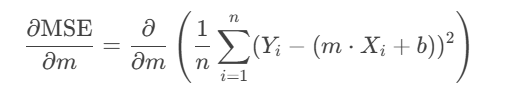

  ce qui donne
  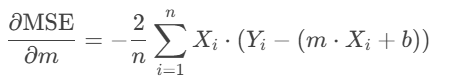

- 2. Par rapport à b
  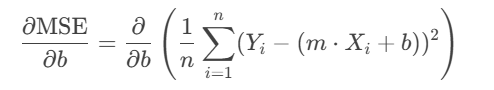

  Ce qui donne
  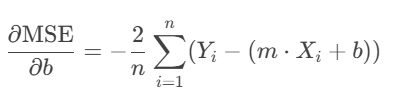

### Question : écrire une fonction permettant de mettre à jour les paramètres m et b. La fonction prendra en entrée des valeurs nulles pour m et b. Cette fonction retournera les nouveaux paramètres m-maj et b-maj trouvés.


- Ce code calcule à partir des dérivés partiel en fonction de m et b, les nouvelles valeurs de m et b


In [9]:
def calculer_grandiant(X, Y, m, b):
    """
    calcule les dérivées partielles
    """
    n = len(Y)
    y_prediction = m * X + b
    error = y_prediction - Y

    dm = (2 / n) * np.dot(error, X)
    db = (2 / n) * np.sum(error)

    return dm, db


### Question : Ecrire une boucle permettant de mettre à jour les paramètres m et b à chaque itération. (Tout l’intérêt étant de ne pas repartir de paramètres aléatoires à partir de la dernière mise à jour)


In [10]:
def decente_gradiant(X, Y, alpha=0.01, seuil=0.00005):
    """
    Descente de gradient
    """
    m, b = 100,89
    previous_error = float('inf')
    iteration = 0

    while True:
        dm, db = calculer_grandiant(X,Y, m, b)

        current_error = calculer_mse(m,b,X,Y)

        if abs(previous_error - current_error) < seuil:
            break


        if not np.isfinite(dm) or not np.isfinite(db):
            break

        m -= alpha * dm
        b -= alpha * db

        previous_error = current_error
        iteration += 1

        print(f"Itération {iteration}: m={m:.5f}, b={b:.5f}, erreur={current_error:.5f}")

    return m, b

def main():
    file_path = "RK_IA_DG_data.csv"
    data = np.loadtxt(file_path, delimiter=",")
    X, Y = data[:, 0], data[:, 1]

    X = (X - np.mean(X)) / np.std(X)
    Y = (Y - np.mean(Y)) / np.std(Y)

    alpha = 0.01
    seuil = 0.00005

    m_optimal, b_optimal = decente_gradiant(X,Y, alpha, seuil)

    print(f"Meilleurs parametres : m = {m_optimal:.5f}, b = {b_optimal:.5f}")
main()

Itération 1: m=98.01547, b=87.22000, erreur=17767.25430
Itération 2: m=96.07064, b=85.47560, erreur=17063.68692
Itération 3: m=94.16470, b=83.76609, erreur=16387.98081
Itération 4: m=92.29688, b=82.09077, erreur=15739.03267
Itération 5: m=90.46642, b=80.44895, erreur=15115.78287
Itération 6: m=88.67257, b=78.83997, erreur=14517.21376
Itération 7: m=86.91459, b=77.26317, erreur=13942.34799
Itération 8: m=85.19177, b=75.71791, erreur=13390.24690
Itération 9: m=83.50341, b=74.20355, erreur=12860.00902
Itération 10: m=81.84882, b=72.71948, erreur=12350.76855
Itération 11: m=80.22731, b=71.26509, erreur=11861.69401
Itération 12: m=78.63824, b=69.83979, erreur=11391.98682
Itération 13: m=77.08095, b=68.44299, erreur=10940.88004
Itération 14: m=75.55481, b=67.07413, erreur=10507.63708
Itération 15: m=74.05919, b=65.73265, erreur=10091.55054
Itération 16: m=72.59348, b=64.41800, erreur=9691.94104
Itération 17: m=71.15708, b=63.12964, erreur=9308.15606
Itération 18: m=69.74942, b=61.86704, erre